In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [15]:
asset = 'ETH'
file_path = f'/Users/gabrielefabietti/projects/fetch_data/data/data4/{asset}USDT_5_data.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,turnover
0,199,1704063600000,2275.76,2284.81,2273.04,2282.75,2694.72,6.143381e+06
1,198,1704063900000,2282.75,2286.36,2281.46,2284.87,1951.21,4.457740e+06
2,197,1704064200000,2284.87,2285.16,2281.50,2282.57,1123.76,2.565941e+06
3,196,1704064500000,2282.57,2283.28,2277.31,2279.09,3363.10,7.668882e+06
4,195,1704064800000,2279.09,2279.61,2275.49,2278.11,3708.63,8.446360e+06


In [16]:
df['one_day_change'] = df['close'] - df['open']
df['pct_change'] = df['one_day_change'] / df['open'] *100

In [17]:
# Basic statistics for pct_change
pct_change_stats = df['pct_change'].describe()
print("Basic statistics for pct_change:")
print(pct_change_stats)

# Additional statistics
mean = df['pct_change'].mean()
variance = df['pct_change'].var()
std_dev = df['pct_change'].std()

print("\nAdditional statistics for pct_change:")
print(f"Mean: {mean:.6f}")
print(f"Variance: {variance:.6f}")
print(f"Standard Deviation: {std_dev:.6f}")
print(f"Skewness: {df['pct_change'].skew():.6f}")
print(f"Kurtosis: {df['pct_change'].kurtosis():.6f}")

Basic statistics for pct_change:
count    134316.000000
mean         -0.000047
std           0.217336
min          -8.091351
25%          -0.091828
50%           0.000838
75%           0.093400
max           6.139531
Name: pct_change, dtype: float64

Additional statistics for pct_change:
Mean: -0.000047
Variance: 0.047235
Standard Deviation: 0.217336
Skewness: -0.939757
Kurtosis: 67.128121


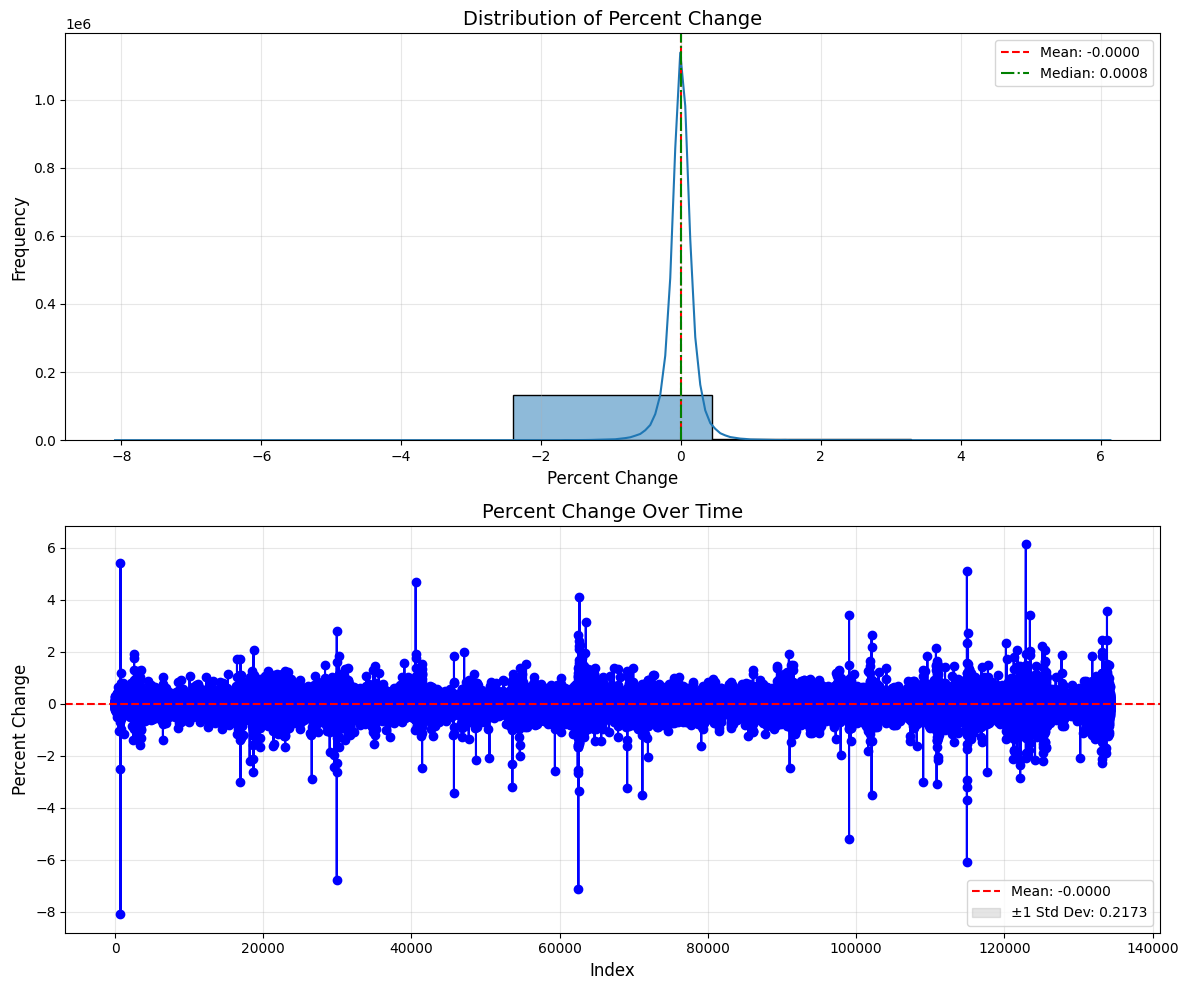

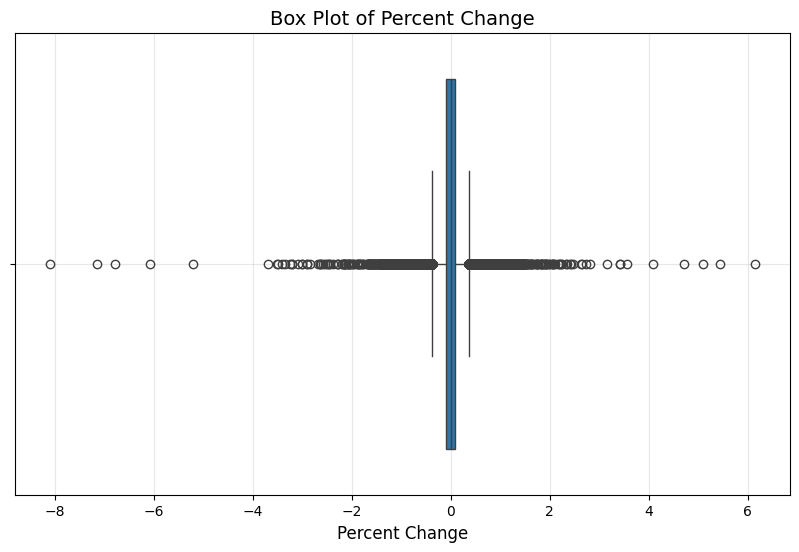

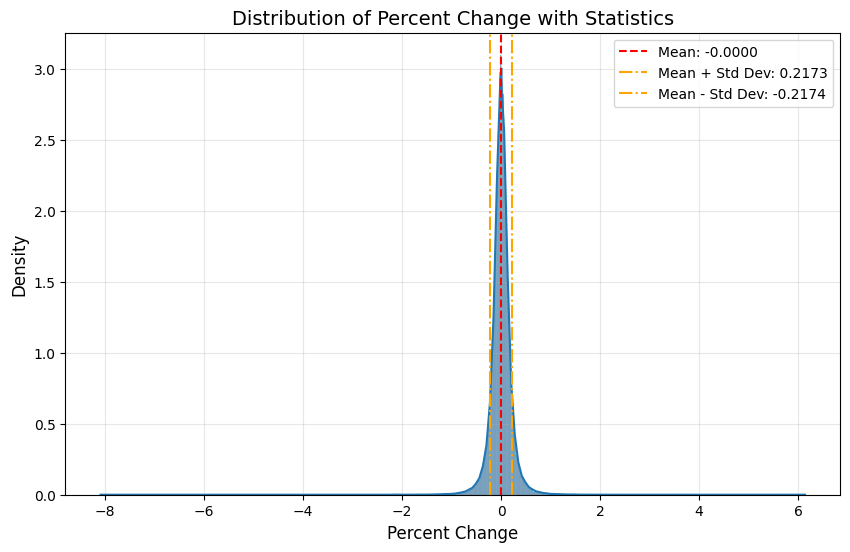

In [9]:
# Visualizations
plt.figure(figsize=(12, 10))

# Histogram with KDE
plt.subplot(2, 1, 1)
sns.histplot(df['pct_change'], kde=True, bins=5)
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.4f}')
plt.axvline(df['pct_change'].median(), color='green', linestyle='-.', label=f'Median: {df["pct_change"].median():.4f}')
plt.title('Distribution of Percent Change', fontsize=14)
plt.xlabel('Percent Change', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Time series plot
plt.subplot(2, 1, 2)
plt.plot(df.index, df['pct_change'], marker='o', linestyle='-', color='blue')
plt.axhline(mean, color='red', linestyle='--', label=f'Mean: {mean:.4f}')
plt.fill_between(df.index, mean-std_dev, mean+std_dev, color='gray', alpha=0.2, label=f'±1 Std Dev: {std_dev:.4f}')
plt.title('Percent Change Over Time', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Percent Change', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Box plot for distribution visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['pct_change'])
plt.title('Box Plot of Percent Change', fontsize=14)
plt.xlabel('Percent Change', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Additional visualization: Distribution with annotations
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['pct_change'], kde=True, stat="density")
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.4f}')
plt.axvline(mean + std_dev, color='orange', linestyle='-.', label=f'Mean + Std Dev: {mean + std_dev:.4f}')
plt.axvline(mean - std_dev, color='orange', linestyle='-.', label=f'Mean - Std Dev: {mean - std_dev:.4f}')
plt.title('Distribution of Percent Change with Statistics', fontsize=14)
plt.xlabel('Percent Change', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [21]:
drop = -2
rise = 1.0

# Find indices where pct_change is less than x%
drop_indices = df[df['pct_change'] < drop].index
print(f"Days with drops greater than 1%: {drop_indices.tolist()}")

# Get the days after drops (if they exist in our dataset)
after_drop_indices = [idx + 1 for idx in drop_indices if idx + 1 in df.index]
print(f"Days after drops: {after_drop_indices}")

# Create a dataframe with just the days after 1% drops
after_drop_df = df.loc[after_drop_indices].copy()

Days with drops greater than 1%: [732, 733, 16926, 18165, 18679, 18682, 26539, 29610, 29914, 29917, 29925, 41436, 45732, 48704, 50526, 53615, 53631, 54617, 59353, 62432, 62519, 62521, 62584, 69105, 71160, 71907, 91023, 99048, 102086, 109050, 110861, 111096, 111103, 114945, 114946, 114947, 114949, 117678, 121236, 121769, 122142, 122154, 122172, 122901, 124143, 125208, 130244, 133150, 133240]
Days after drops: [733, 734, 16927, 18166, 18680, 18683, 26540, 29611, 29915, 29918, 29926, 41437, 45733, 48705, 50527, 53616, 53632, 54618, 59354, 62433, 62520, 62522, 62585, 69106, 71161, 71908, 91024, 99049, 102087, 109051, 110862, 111097, 111104, 114946, 114947, 114948, 114950, 117679, 121237, 121770, 122143, 122155, 122173, 122902, 124144, 125209, 130245, 133151, 133241]



Statistics for days after 1% drops:
count    49.000000
mean      0.319066
std       1.988355
min      -8.091351
25%      -0.438131
50%       0.363860
75%       1.038932
max       5.433081
Name: pct_change, dtype: float64

Mean: 0.319066
Variance: 3.953557
Standard Deviation: 1.988355


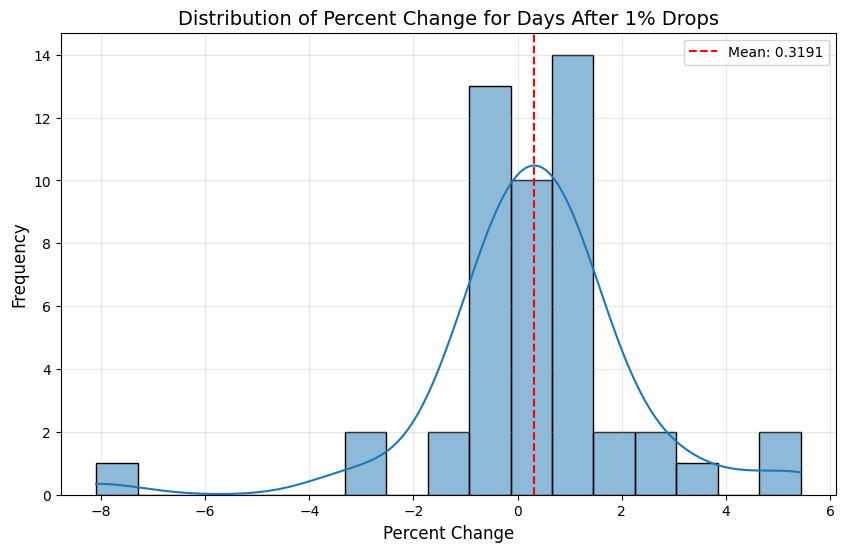

In [22]:
    # Calculate statistics for days after 1% drops
    print("\nStatistics for days after 1% drops:")
    stats = after_drop_df['pct_change'].describe()
    print(stats)
    
    mean = after_drop_df['pct_change'].mean()
    var = after_drop_df['pct_change'].var()
    std = after_drop_df['pct_change'].std()
    
    print(f"\nMean: {mean:.6f}")
    print(f"Variance: {var:.6f}")
    print(f"Standard Deviation: {std:.6f}")
    
    # Visualize days after drops
    plt.figure(figsize=(10, 6))
    sns.histplot(after_drop_df['pct_change'], kde=True)
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.4f}')
    plt.title('Distribution of Percent Change for Days After 1% Drops', fontsize=14)
    plt.xlabel('Percent Change', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

Data for regression analysis:
        pct_change  pct_change_lag1
1         0.092870         0.307150
2        -0.100662         0.092870
3        -0.152460        -0.100662
4        -0.043000        -0.152460
5         0.039506        -0.043000
...            ...              ...
134311    0.212038         0.290217
134312    0.079748         0.212038
134313   -0.110530         0.079748
134314   -0.007720        -0.110530
134315    0.072058        -0.007720

[134315 rows x 2 columns]

Linear Regression Results:
Coefficient (slope): -0.009580
Intercept: -0.000050
Mean Squared Error: 0.047230
R-squared: 0.000092

Detailed Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     12.33
Date:                Fri, 11 Apr 202

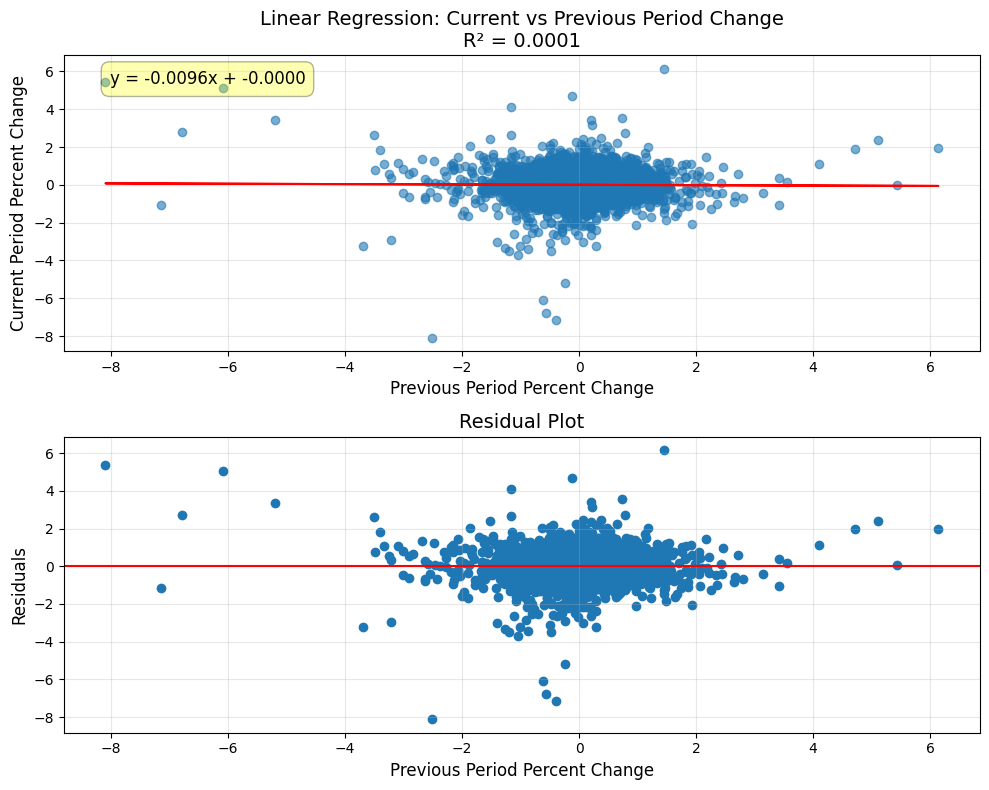

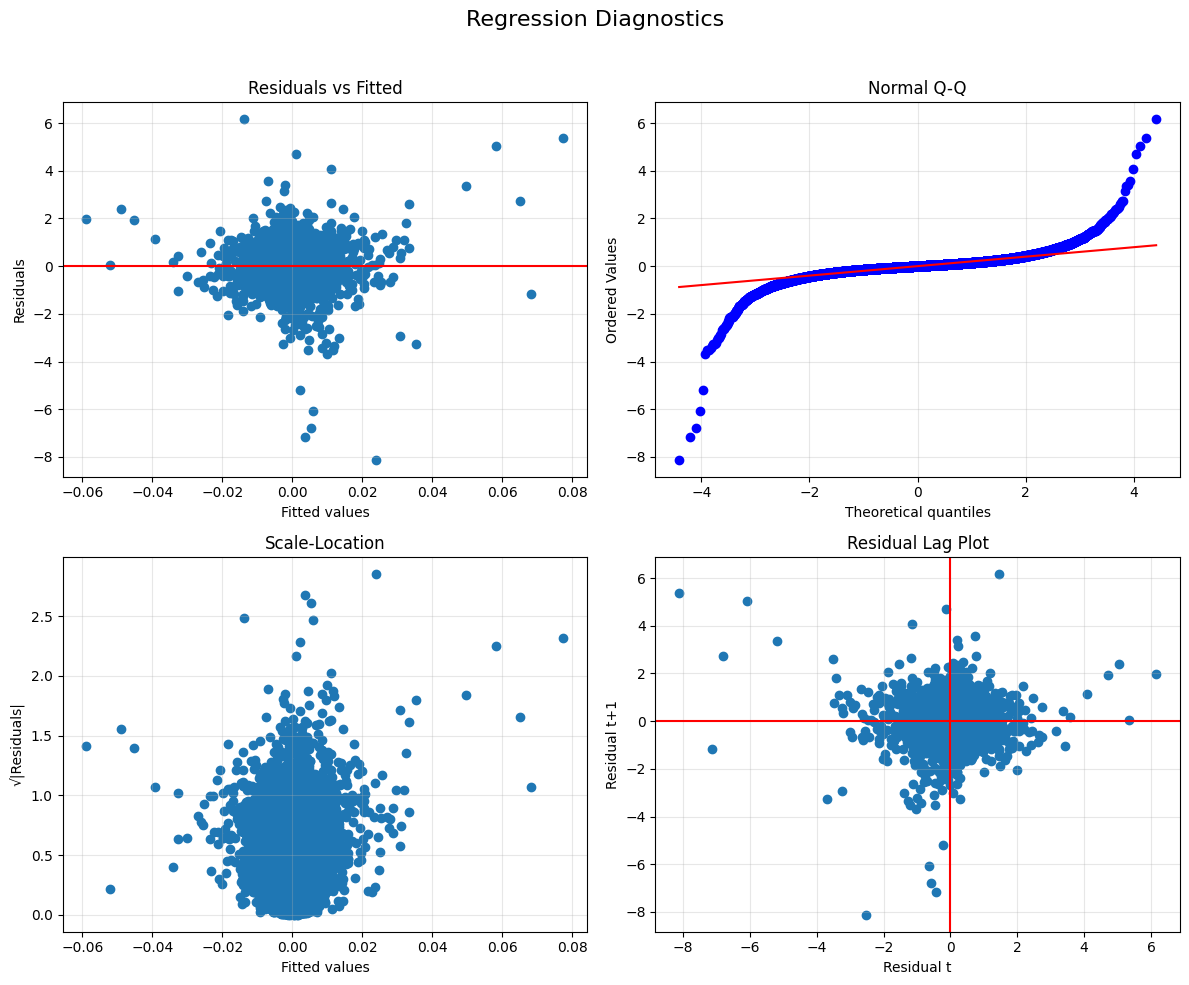

In [25]:
# Create lag features for percent change
df['pct_change_lag1'] = df['pct_change'].shift(1)

# Drop the first row since it will have NaN for the lag feature
df_regression = df.dropna().copy()

print("Data for regression analysis:")
print(df_regression[['pct_change', 'pct_change_lag1']])

# Check if we have enough data for regression
if len(df_regression) < 3:
    print("\nWarning: Limited data points for meaningful regression analysis.")
    print("Results may not be statistically significant.")

# Prepare data for regression
X = df_regression['pct_change_lag1'].values.reshape(-1, 1)
y = df_regression['pct_change'].values

# Use statsmodels for the regression
X_sm = sm.add_constant(X)  # Adding a constant for the intercept
model = sm.OLS(y, X_sm).fit()

# Get predictions
y_pred = model.predict(X_sm)
residuals = y - y_pred

# Calculate metrics manually
mse = np.mean((y - y_pred) ** 2)
r_squared = model.rsquared

print("\nLinear Regression Results:")
print(f"Coefficient (slope): {model.params[1]:.6f}")
print(f"Intercept: {model.params[0]:.6f}")
print(f"Mean Squared Error: {mse:.6f}")
print(f"R-squared: {r_squared:.6f}")

print("\nDetailed Regression Results:")
print(model.summary())

# Visualize the regression
plt.figure(figsize=(10, 8))

# Scatter plot with regression line
plt.subplot(2, 1, 1)
plt.scatter(X, y, alpha=0.6)
plt.plot(X, y_pred, 'r-')
plt.title(f'Linear Regression: Current vs Previous Period Change\nR² = {r_squared:.4f}', fontsize=14)
plt.xlabel('Previous Period Percent Change', fontsize=12)
plt.ylabel('Current Period Percent Change', fontsize=12)
plt.grid(True, alpha=0.3)

# Add the regression equation to the plot
equation = f'y = {model.params[1]:.4f}x + {model.params[0]:.4f}'
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=12, ha='left', va='top',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

# Residual plot
plt.subplot(2, 1, 2)
plt.scatter(X, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot', fontsize=14)
plt.xlabel('Previous Period Percent Change', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create a diagnostic plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Regression Diagnostics', fontsize=16)

# Residuals vs Fitted
axes[0, 0].scatter(y_pred, residuals)
axes[0, 0].axhline(y=0, color='r', linestyle='-')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')
axes[0, 0].grid(True, alpha=0.3)

# QQ Plot - Fixed the issue here
from scipy import stats as scipy_stats  # Import specifically to avoid confusion
scipy_stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q')
axes[0, 1].grid(True, alpha=0.3)

# Scale-Location
axes[1, 0].scatter(y_pred, np.sqrt(np.abs(residuals)))
axes[1, 0].set_xlabel('Fitted values')
axes[1, 0].set_ylabel('√|Residuals|')
axes[1, 0].set_title('Scale-Location')
axes[1, 0].grid(True, alpha=0.3)

# Lag plot for residuals
if len(residuals) > 2:
    residuals_lag = np.array([residuals[i:i+2] for i in range(len(residuals)-1)])
    axes[1, 1].scatter(residuals_lag[:, 0], residuals_lag[:, 1])
    axes[1, 1].axhline(y=0, color='r', linestyle='-')
    axes[1, 1].axvline(x=0, color='r', linestyle='-')
    axes[1, 1].set_xlabel('Residual t')
    axes[1, 1].set_ylabel('Residual t+1')
    axes[1, 1].set_title('Residual Lag Plot')
else:
    axes[1, 1].text(0.5, 0.5, 'Insufficient data for lag plot', 
                    horizontalalignment='center', verticalalignment='center',
                    transform=axes[1, 1].transAxes)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for the suptitle
plt.show()